In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Salary_Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.dtypes #correct datatypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
df1=df.replace('?',np.NaN)

In [9]:
df=df1.dropna(subset=["Salary"], axis=0)
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


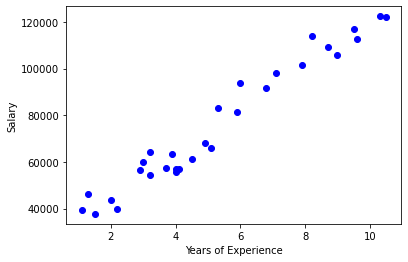

In [11]:
plt.scatter(df.YearsExperience, df.Salary,  color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9332.43497952]]
Intercept:  [26291.91710513]


Text(0, 0.5, 'Salary')

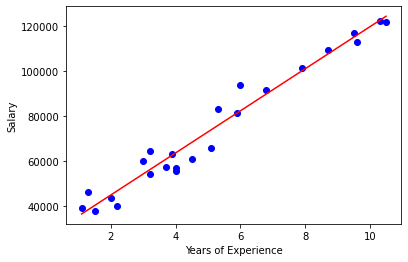

In [16]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [17]:
test_x=np.asanyarray(test[['YearsExperience']])
test_y=np.asanyarray(test[['Salary']])

In [18]:
accuracy=regr.score(test_x, test_y)
"Accuracy: {}%".format(int(round(accuracy*100)))

'Accuracy: 92%'